#Exploratory Data Analysis- US accidents 



###**Objective**:To prevent number of accidents occuring in US 

Data analysis process covers the following Phases

1. Ask
2. Prepare
3. Process
4. Analyze
5. Share
6. Act

##Ask Phase
1. Identifying which state the observed the majority of accidents/How about per capita?
2. Identifying if there is any trend in accident (Increasing or decreasing trend over years)
3. How could these trends helps in avoiding accidents?
4. Identifying at what time span majority of accidents occured
5. Which days of week have most accidents?
6. Which months have most accidents?
7. Is there any enviromental impact on accident?



Stackholders: In this case study Primary stackholder could be any offcial from road transport authority. Seconday stackholder could be project manager, other data analyst who supported the project

## Prepare Phase

1. The dataset used is a public data, which covers 49 states of USA, which was collected from February 2016 to December 2020. Which was collected from various data providers including multiple APIs that provide streaming traffic event data(such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks)

2. The data is organized in long format

3. Checking Bias and Credibility in the data using ROCCC (Reliable, Orginal, Comprehensive, Current, Cited)


**Realiable**: As the dataset is obatianed from various sources there is high chance that data is less realiable. Thereby data set might be less accurate, complete, unbaised.

**Orginal**: The data is obatined from second party source (US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks)

**Comprehensive**: The dataset is very comprehensive as it contain all the relevant information that is required for the analysis

**Current**: The dataset is being update at regular intervals of time. Therefore dataset is current and relevant

**Cited**: Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. “**Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights**.” In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

4. Licensing, Privacy: This dataset is being distributed only for Research purposes, under Creative Commons Attribution-Noncommercial-ShareAlike license (CC BY-NC-SA 4.0). This data only for non-commercial, research, or academic applications. You may need to cite the above papers if you use this dataset.
 

In [ ]:
#Download data
!pip install opendatasets --upgrade 

Requirement already up-to-date: opendatasets in /usr/local/lib/python3.7/dist-packages (0.1.10)


In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vamsikrishnabh
Your Kaggle Key: ··········


  0%|          | 0.00/290M [00:00<?, ?B/s]

100%|██████████| 290M/290M [00:02<00:00, 118MB/s]


In [ ]:
data_location= '/content/us-accidents/US_Accidents_Dec20_Updated.csv'

## Process
1.   Loading the file using Pandas
2.   Look at some information about the data and columns
3.   Checking and fixing errors of the dataset
4.   Transforming the data in order to work effectively
5.   Documentation of cleaning process

In [ ]:
#Importing library
import pandas as pd

In [ ]:
#Reading dataset
df=pd.read_csv(data_location)

In [ ]:
#Viewing the dataset
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,3001.0,Yale St,L,Houston,Harris,TX,77018-8433,US,US/Central,KMCJ,2018-06-28 08:35:00,84.2,NaN,70.0,30.02,9.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,NaN,Cypress Ave,R,Colton,San Bernardino,CA,92324,US,US/Pacific,KSBD,2019-01-10 02:00:00,46.9,NaN,74.0,30.14,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,8798.0,SW 72nd St,L,Miami,Miami-Dade,FL,33173-3512,US,US/Eastern,KTMB,2020-11-23 12:53:00,76.0,76.0,85.0,30.00,10.0,NNW,16.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,NaN,I-215 N,R,Salt Lake City,Salt Lake,UT,84129,US,US/Mountain,KU42,2019-12-29 22:54:00,27.0,19.0,81.0,25.81,10.0,SSE,8.0,0.0,Cloudy,False,F

In [ ]:
#Look at some information about the data and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
#Statatics of the real valued columns
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
#Counting missing values in the dataset
missing_values_column=df.isnull().sum().sort_values(ascending=False)
missing_percentage=missing_values_column/len(df)
missing_percentage

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

Text(0, 0.5, '% of NaN elements')

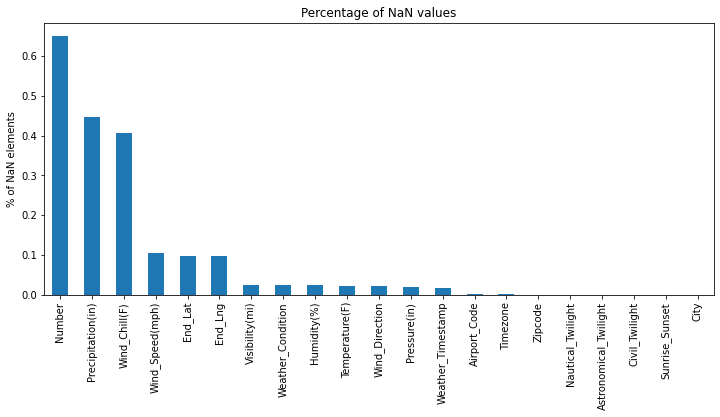

In [ ]:
#ploting percentage missing values
ax=missing_percentage[missing_percentage!=0].plot(kind='bar',title='Percentage of NaN values',figsize=(12,5));
ax.set_ylabel('% of NaN elements')

In [ ]:
#Taking out the columns which have columns more 20% of NaN values
colum_off=df.isna().sum()[df.isna().sum()>=(0.2*len(df))]
list_colum_off=colum_off.index.to_list()

All columns containing 20% of NaN values or more will be removed since those columns cannot be used as representative values. But before removing them, I'll create a copy of the data frame, and I'll continue working on this new data frame.

In [ ]:
#Making a copy orginal dataframe and working on the copy
df_copy=df.copy()

In [ ]:
df_copy.drop(list_colum_off, axis=1, inplace=True)

In [ ]:
df_copy.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

Picking columns which are useful to fulfill the objective

In [ ]:
#Picking only those columns which are necessary to answer the objective
interesting_columns=['City','Start_Time','Start_Lat','Start_Lng','Temperature(F)','Weather_Condition',]

In [ ]:
# Picking columns to identify number of accidents occured at different parts of road
checking_columns=['Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

##Analyze Phase


In [ ]:
### Accidents at various parts of the road

In [ ]:
#creating data for checking accidents at various parts of the road
df_new_1=df_copy[checking_columns]

In [ ]:
df_new_1

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,False,False,False,False,False,False,False,False,False,True,False,False,False
2906606,False,False,False,False,False,False,False,False,False,False,False,False,False
2906607,False,False,False,False,False,False,False,False,False,False,False,False,False
2906608,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Function to determine number of accidents that occured at various parts of the road.
def counting(columns,data):
  numb=list()
  for elements in columns:
    x=(data[elements].value_counts())
    numb.append(x)
  return numb

In [ ]:
y=counting(checking_columns,df_new_1)

In [ ]:
# Extracts number of accidents that occured various part of the road
import numpy as np
tru=[]
fal=[]
for elements in np.arange(12):
  t=y[elements][1]
  s=y[elements][0]
  tru.append(t)
  fal.append(s)

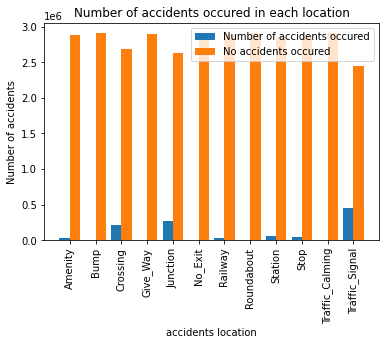

In [ ]:
# ploting bar graph to visualize the accidents at various parts of road 
import matplotlib.pyplot as plt 
X=['Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal']

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, tru, 0.4, label = 'Number of accidents occured')
plt.bar(X_axis + 0.2, fal, 0.4, label = 'No accidents occured')
  
plt.xticks(X_axis, X,rotation=90)
plt.xlabel("accidents location")
plt.ylabel("Number of accidents")
plt.title("Number of accidents occured in each location")
plt.legend()
plt.show()

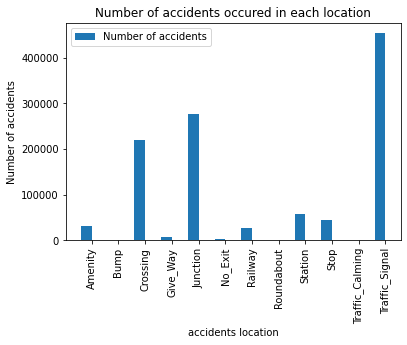

In [ ]:
plt.bar(X_axis - 0.2, tru, 0.4, label = 'Number of accidents')
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("accidents location")
plt.ylabel("Number of accidents")
plt.title("Number of accidents occured in each location")
plt.legend()
plt.show()

### Analyzing city column

In [ ]:
#Number of unique cities present in dataset
cities=df.City.unique()
len(cities)

11790

In [ ]:
cities_by_accident= df['City'].value_counts()
cities_by_accident

Los Angeles           68411
Houston               68265
Charlotte             56176
Miami                 49965
Dallas                48525
                      ...  
Suquamish                 1
Niagara University        1
Thornwood                 1
Geyser                    1
Pimento                   1
Name: City, Length: 11789, dtype: int64

In [ ]:
type(cities_by_accident)

pandas.core.series.Series

In [ ]:
#Percentage of accidents of 95% percentage of data
percentage_accidents=np.percentile(cities_by_accident,95)
percentage_accidents

848.0

In [ ]:
#getting top 10 cities by accident
top_ten_cities_by_accidents=cities_by_accident[0:10]
print(top_ten_cities_by_accidents)
cities_plot=top_ten_cities_by_accidents.index
cities_list=cities_plot.to_list()
cities_axis = np.arange(len(top_ten_cities_by_accidents))

Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
Austin         38808
Raleigh        31355
Atlanta        29244
Sacramento     28984
Orlando        28092
Name: City, dtype: int64


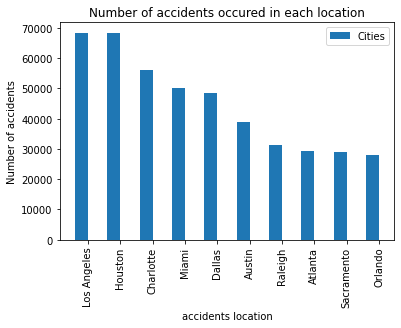

In [ ]:
plt.bar(cities_axis - 0.2, top_ten_cities_by_accidents, 0.4, label = 'Cities')
plt.xticks(cities_axis, cities_list, rotation=90)
plt.xlabel("accidents location")
plt.ylabel("Number of accidents")
plt.title("Number of accidents occured in each location")
plt.legend()
plt.show()

About 95% cities have accidents which are less than 848

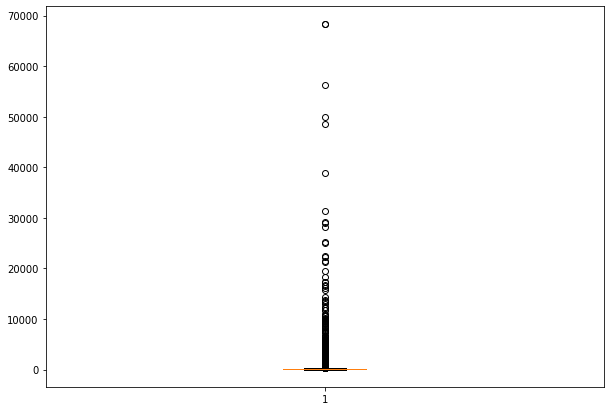

In [ ]:
#Plotting Box Plot to visulize the number of accidents per city 
data = cities_by_accident
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(data)
# show plot
plt.show()

In [ ]:
#ploting histogram to visualize 95% (low accidents cities less than 1000 accidents)
import seaborn as sns
sns.set_style('darkgrid')
sns.set_theme(style="ticks")

[Text(0, 0.5, 'Cities observed such number of accidents'),
 Text(0.5, 0, 'Number of accidents')]

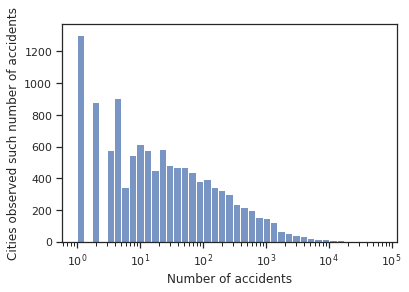

In [ ]:
ax=sns.histplot(cities_by_accident,log_scale=True)
ax.set(xlabel='Number of accidents', ylabel='Cities observed such number of accidents')

In [ ]:
len(cities_by_accident[cities_by_accident==1])

1306

### Analyzing Start time

In [ ]:
#Coverting str to date time
df['Start_Time']=pd.to_datetime(df['Start_Time'])

[Text(0, 0.5, 'Percentage of accidents'), Text(0.5, 0, '24hrs interval')]

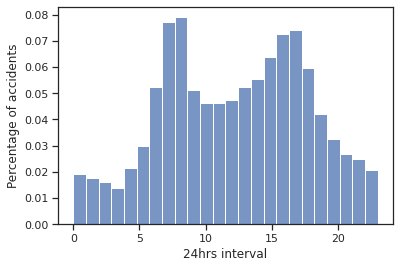

In [ ]:
#Analyzing time
ay=sns.histplot(df['Start_Time'].dt.hour, bins=24,stat="density")
ay.set(xlabel='24hrs interval', ylabel='Percentage of accidents')

[Text(0, 0.5, 'Percentage of accidents'), Text(0.5, 0, 'week')]

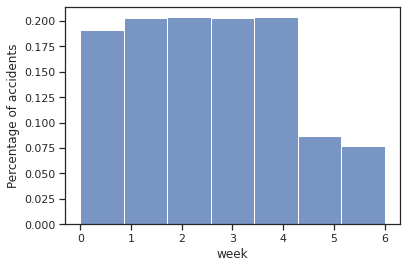

In [ ]:
#Analyzing day of week
az=sns.histplot(df['Start_Time'].dt.dayofweek, bins=7,stat="density")
az.set(xlabel='week', ylabel='Percentage of accidents')

In [ ]:
# Analyzing trends between weekdays and weekneds
saturdays=df['Start_Time'][df['Start_Time'].dt.dayofweek==5]
sundays=df['Start_Time'][df['Start_Time'].dt.dayofweek==6]
mondays=df['Start_Time'][df['Start_Time'].dt.dayofweek==0]

[Text(0, 0.5, 'Percentage of accidents'), Text(0.5, 0, '24hrs interval')]

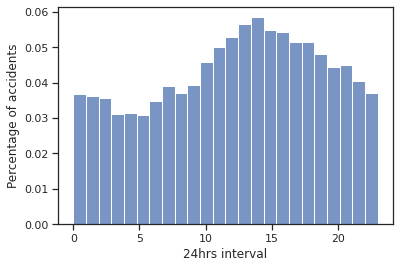

In [ ]:
#Plotting trends for weekend-Sunday
aq=sns.histplot(sundays.dt.hour, bins=24,stat="density")
aq.set(xlabel='24hrs interval', ylabel='Percentage of accidents')

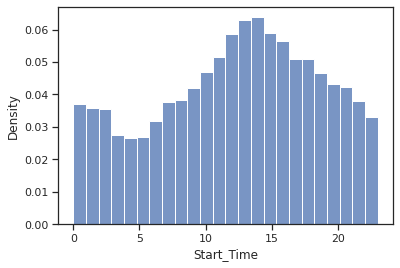

In [ ]:
#Plotting trends for weekend-Saturday
sns.histplot(saturdays.dt.hour, bins=24,stat="density")

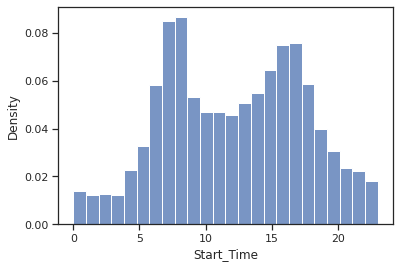

In [ ]:
#Plotting trends for weekday-Monday
sns.histplot(mondays.dt.hour, bins=24,stat="density")

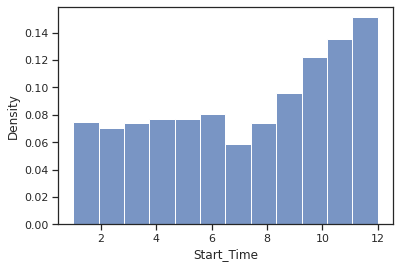

In [ ]:
#Analyzing monthly trend
sns.histplot(df['Start_Time'].dt.month, bins=12,stat="density")

In [ ]:
#Looking at the trend of december as it contributes majority of accidents 
December=df['Start_Time'][df['Start_Time'].dt.month==12]

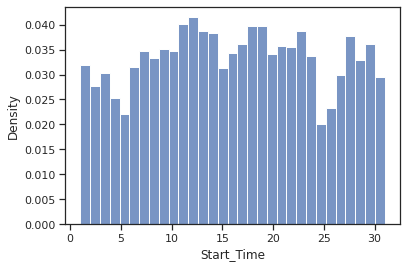

In [ ]:
#Analyzing daily trends for the month of december for all the years(2016 to 2020)
sns.histplot(December.dt.day, bins=31,stat="density")

###Analyzing start latitude and start longitude

In [ ]:
import folium

In [ ]:
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
sample_df=df.sample(int(0.001*len(df)))
lat_lon_pairs=list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [ ]:
map=folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

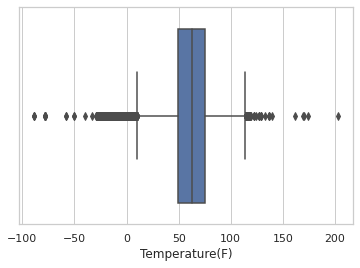

In [ ]:
#ploting box plot to visualize temperature range
import seaborn as sns
sns.set_theme(style="whitegrid")
data_temp=df['Temperature(F)']
ax = sns.boxplot(x=data_temp)

The highest temperature ever recorded is 134.1 °F at Furnace Creek, California, United States on 10 July 1913. The lowest temperature ever recorded in the United States was -80°F (-62 degrees Celsius) on January 23, 1971 at Prospect Creek Camp. There several datapoints which is outside this sepecified zone





In [ ]:
#removing outliers from Temperature(F) column
df_working_temperature= df[(df['Temperature(F)']>-80) & (df['Temperature(F)']<134)]

In [ ]:
#Checking percentage of data lost after renoving outliers 
outlier_temp=len(df_working_temperature)/len(df)
outlier_temp

0.976867897653968

In [ ]:
import numpy as np
np.percentile(df_working_temperature['Temperature(F)'],50)

63.0

In [ ]:
#Making groups within temperature column
#low temperature= -80°F till 48°F
#moderate temperature= 49°F till 63°F
#High temperature= 64°F till 134°F
low_temperatures=df_working_temperature[(df_working_temperature['Temperature(F)']>=-80) & (df_working_temperature['Temperature(F)']<48)]
moderate_temperatures=df_working_temperature[(df_working_temperature['Temperature(F)']>49) & (df_working_temperature['Temperature(F)']<63)]
high_temperatures=df_working_temperature[(df_working_temperature['Temperature(F)']>64) & (df_working_temperature['Temperature(F)']<134)]


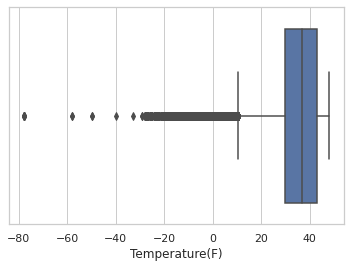

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
data_temp=low_temperatures['Temperature(F)']
ax = sns.boxplot(x=data_temp)

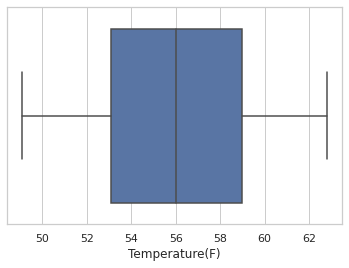

In [ ]:
sns.set_theme(style="whitegrid")
data_temp=moderate_temperatures['Temperature(F)']
ax = sns.boxplot(x=data_temp)

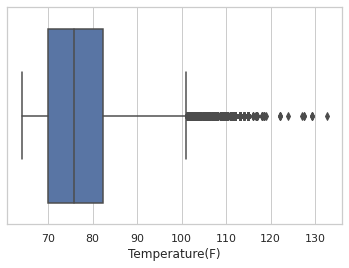

In [ ]:
sns.set_theme(style="whitegrid")
data_temp=high_temperatures['Temperature(F)']
ax = sns.boxplot(x=data_temp)

In [ ]:
#Finding number of accidents that occcured 
low_temperature_accidents=len(low_temperatures)
moderate_temperature_accidents=len(moderate_temperatures)
high_temperature_accidents=len(high_temperatures)
print("Number of accidents that occured at low temperatures {}".format(low_temperature_accidents))
print("Number of accidents that occured at moderate temperatures {}".format(moderate_temperature_accidents))
print("Number of accidents that occured at high temperatures {}".format(high_temperature_accidents))

Number of accidents that occured at low temperatures 656334
Number of accidents that occured at moderate temperatures 683148
Number of accidents that occured at high temperatures 1308496


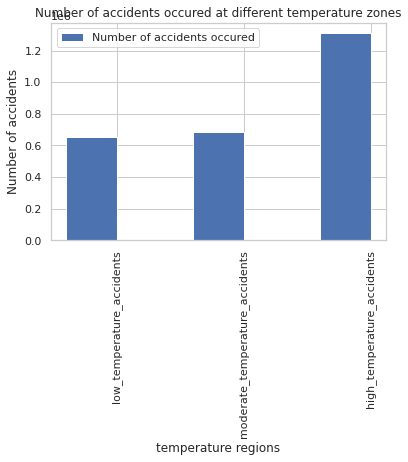

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=['low_temperature_accidents','moderate_temperature_accidents','high_temperature_accidents']
X_axis = np.arange(len(x))
temp=[low_temperature_accidents,moderate_temperature_accidents,high_temperature_accidents]
plt.bar(X_axis - 0.2, temp, 0.4, label = 'Number of accidents occured')


plt.xticks(X_axis, x,rotation=90)
plt.xlabel("temperature regions")
plt.ylabel("Number of accidents")
plt.title("Number of accidents occured at different temperature zones")
plt.legend()
plt.show()

In [ ]:
checking_columns=['Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

In [ ]:
various_temp=counting(checking_columns,high_temperatures)

In [ ]:
import numpy as np
tru_temp=[]
fal_temp=[]
for elements in np.arange(12):
  t=various_temp[elements][1]
  s=various_temp[elements][0]
  tru_temp.append(t)
  fal_temp.append(s)

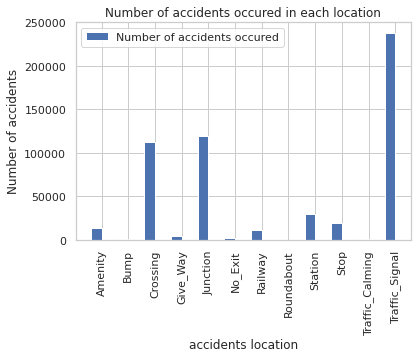

In [ ]:
# Finding out where the number of accidents are more at high temperature zone
X=['Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal']

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, tru_temp, 0.4, label = 'Number of accidents occured')
#plt.bar(X_axis + 0.2, fal_temp, 0.4, label = 'No accidents occured')
  
plt.xticks(X_axis, X,rotation=90)
plt.xlabel("accidents location")
plt.ylabel("Number of accidents")
plt.title("Number of accidents occured in each location")
plt.legend()
plt.show()

##Weather Conditions

In [ ]:
total_weather=len(df.Weather_Condition.unique())

In [ ]:
#number of different weather conditions
print('Total number of different weather conditions avaliable in dataset',total_weather)

Total number of different weather conditions avaliable in dataset 129


In [ ]:
df.Weather_Condition.value_counts()[0:80]

Fair                            692680
Clear                           498925
Mostly Cloudy                   386122
Partly Cloudy                   268851
Cloudy                          245054
                                 ...  
Light Snow and Sleet / Windy         9
Drizzle / Windy                      7
Light Snow with Thunder              7
Patches of Fog / Windy               6
Heavy Snow with Thunder              6
Name: Weather_Condition, Length: 90, dtype: int64

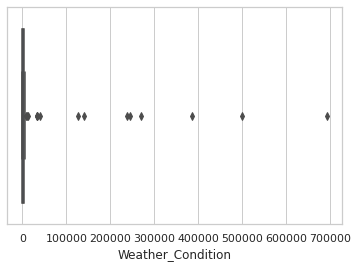

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
data_temp=df.Weather_Condition.value_counts()[0:80]
ax = sns.boxplot(x=data_temp)

In [ ]:
import numpy as np
np.percentile (df.Weather_Condition.value_counts()[0:80],75)

3145.0

75% of data contributes only 3145 accidents. Therefore analysis is performed on 25% of data which have majority of accidents

In [ ]:
df_weather=df.Weather_Condition.value_counts()[0:80][df.Weather_Condition.value_counts()[0:80]>3145]

In [ ]:
#converting series to dataframe
df_weather_1 = pd.DataFrame(df_weather)

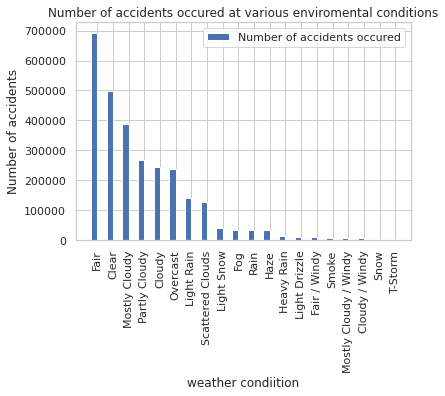

In [ ]:
import matplotlib.pyplot as plt 
X=df_weather_1.index.to_list()
data = df_weather_1['Weather_Condition']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, data, 0.4, label = 'Number of accidents occured')
  
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("weather condiition")
plt.ylabel("Number of accidents")
plt.title("Number of accidents occured at various enviromental conditions")
plt.legend()
plt.show()

## Summary and conclusion



1.   It was observed that majority of accidents occur at Traffic signal(453665), junction (2902752), crossing (218929). Very less accidents occur at Traffic_calming, Bump, Roundabouts. Thereby it is important to focus at these areas to minimize the damage.

2.   From the box plot it was observed that majority of cities (95%) have less than 848 accidents, Majority of cities about 1306 has observed only 1 accident for a span of 4 years.

3.   1. On weekdays: High percentage of accidents occur between 6 to 10 am and 3pm to 6pm
     2. On weekends:High percentage of accidents occur between 10 am and 3 am


4.   Percentage of accidents that occur on weekday (Monday to Friday) are very much similar and it drastically falls on weekends(saturday and sunday)

5.   The majority of accidents occur when temperature range is between 64°F till 134°F and they are occuring at Traffic_Signal, Junctions and crossing 

6.   It is very clear that majority accidents when it fair, clear, and cloudy

7.   The number of accidents that occur during the year is constant
